In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
#libraries and themes

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
response = requests.get('https://.html', 'html.parser')

In [ ]:
soup = BeautifulSoup (response.content)

In [ ]:
print (soup.tag) # replace "tag" with div or p or whatever!
print(soup.div.name) # get the name of the div (div)
print(soup.div.attrs) # return a dictionary with it's attributes {'id': 'example'}
print(soup.div.string) # return string inside tag
for child in soup.ul.children: # get children of a tag
    print(child)
for parent in soup.li.parents: # navigate up the tree and get parents from children
    print(parent)
print(soup.find_all("h1"))

import re
soup.find_all(re.compile("[ou]l")) #find every <ol> and <ul> tag on the page (re = using regex)

import re
soup.find_all(re.compile("h[1-9]")) # find h1-h9 tags (re = using regex)

# We can also just specify all of the elements we want to find by 
# supplying the function with a list of the tag names we are looking for:
soup.find_all(['h1', 'a', 'p'])

soup.find_all(attrs={'class':'banner'}) #find all elements with class and 'banner'
soup.find_all(attrs={'class':'banner', 'id':'jumbotron'})

In [ ]:
#Using a function to find all
def has_banner_class_and_hello_world(tag):
    return tag.attr('class') == "banner" and tag.string == "Hello world"
 
soup.find_all(has_banner_class_and_hello_world)

In [ ]:
# The .select() method will take in all of the CSS selectors you normally use in a .css file!

soup.select(".recipeLink") #select elements that have class 'recipeLink'
soup.select("#selected") #select elements that have id 'selected'

# loop through all links 
for link in soup.select(".recipeLink > a"):
  webpage = requests.get(link)
  new_soup = BeautifulSoup(webpage)

In [ ]:
soup.get_text() # will return ALL the strings from the whole tag
soup.get_text('|') #add character to separate the strings
# ex: 'Search Results for: |Funfetti'

In [ ]:
import requests
from bs4 import BeautifulSoup

prefix = "https://content.codecademy.com/courses/beautifulsoup/"
webpage_response = requests.get('https://content.codecademy.com/courses/beautifulsoup/shellter.html')

webpage = webpage_response.content
soup = BeautifulSoup(webpage, "html.parser")

turtle_links = soup.find_all("a")
links = []
#go through all of the a tags and get the links associated with them:
for a in turtle_links:
  links.append(prefix+a["href"])
    
#Define turtle_data:
turtle_data = {}

#follow each link:
for link in links:
  webpage = requests.get(link)
  turtle = BeautifulSoup(webpage.content, "html.parser")
  #Add your code here:
  turtle_name = turtle.select(".name")[0]
  turtle_data[turtle_name] = []
  
print(turtle_data)

In [ ]:
import requests
from bs4 import BeautifulSoup

prefix = "https://content.codecademy.com/courses/beautifulsoup/"
webpage_response = requests.get('https://content.codecademy.com/courses/beautifulsoup/shellter.html')

webpage = webpage_response.content
soup = BeautifulSoup(webpage, "html.parser")

turtle_links = soup.find_all("a")
links = []
#go through all of the a tags and get the links associated with them"
for a in turtle_links:
  links.append(prefix+a["href"])
    
#Define turtle_data:
turtle_data = {}

#follow each link:
for link in links:
  webpage = requests.get(link)
  turtle = BeautifulSoup(webpage.content, "html.parser")
  turtle_name = turtle.select(".name")[0].get_text()
  
  stats = turtle.find("ul")
  stats_text = stats.get_text("|")
  turtle_data[turtle_name] = stats_text.split("|")

turtle_df = pd.DataFrame(turtle_data)

In [ ]:
soup = BeautifulSoup("<div class='tweet'><span>New year, new me. </span></div><div id='user'><p>MirandaRights</p></div>")
 
print(soup.find(id="user").get_text())
# displays 'MirandaRights'

In [ ]:
soup = BeautifulSoup("<div class='tweet'><span>New year, new me. </span></div><div id='user'><p>MirandaRights</p></div>")
 
print(soup.div.get_text())
# 'New year,new me.'

In [ ]:
<ul>
<li class="one">Red</li>
<li class="fish">Fish</li>
<li class="two">Blue</li>
<li class="fish">Fish</li>
</ul>

soup = BeautifulSoup("seuss.html")
 
print(soup._______)
# use 
select(".two").get_text()

In [ ]:
soup = BeautifulSoup("""
<h1>Syllabus</h1>
<div><h3>Unit 1: Variables</h3><p>Learn the basics!</p></div>
<div><h3>Unit 2: Loops</h3> <p>Repeat stuff!</p></div>
<div><h3>Unit 3: Review</h3></div>
""")
 
for child in soup.div.children:
  print(type(child))
 #displays
<class 'bs4.element.Tag'> <class 'bs4.element.Tag'

Chocolate project

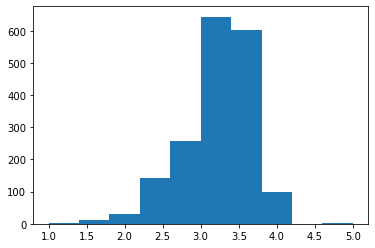

In [2]:
# import codecademylib3_seaborn
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

response = requests.get ('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html', 'html.parser')

soup = BeautifulSoup (response.content)
# <td class="Rating">2.75</td>

r = soup.find_all(attrs={"class": "Rating"})

ratings = []
for rating in r[1:]:
  ratings.append(float(rating.get_text()))

plt.hist(ratings)
plt.show()

In [7]:
c = soup.select(".Company")

companies = []
for company in c[1:]:
  companies.append (company.get_text())

dict = {'Company' : companies, 'Rating': ratings}

df = pd.DataFrame.from_dict(dict)
df.info

avg_ratings = df.groupby('Company').Rating.mean()
ten_best = avg_ratings.nlargest(10)
print (ten_best)


In [9]:
cocoa_percents = []
cocoa_percent_tags = soup.select(".CocoaPercent")
 
for td in cocoa_percent_tags[1:]:
  percent = int (float(td.get_text().strip('%')))
  cocoa_percents.append(percent)

df['CocoaPercentage'] = cocoa_percents
df.head()

,Company,Rating,CocoaPercentage
0,A. Morin,3.75,63
1,A. Morin,2.75,70
2,A. Morin,3.00,70
3,A. Morin,3.50,70
4,A. Morin,3.50,70


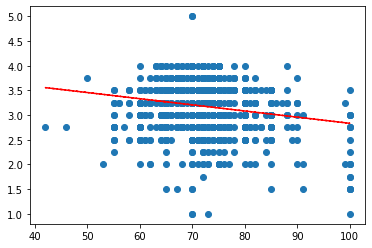

In [11]:
#Make scatter plot
plt.scatter (df.CocoaPercentage, df.Rating)
# Make a best-fit line
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()

In [ ]:
###############################################

In [ ]:
#data vis
import codecademylib
from matplotlib import pyplot as plt

drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales1 =  [91, 76, 56, 66, 52, 27]
sales2 = [65, 82, 36, 68, 38, 40]
  
plt.bar(range(len(drinks)), sales1)
plt.bar(range(len(drinks)), sales2, bottom=sales1)

plt.legend(["Location 1", "Location 2"])

plt.show()

In [ ]:
import codecademylib
from matplotlib import pyplot as plt

drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales1 =  [91, 76, 56, 66, 52, 27]
sales2 = [65, 82, 36, 68, 38, 40]

#Paste the x_values code here
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
store1_x = [t*element + w*n for element
             in range(d)]

plt.bar (store1_x, sales1)

n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = .8 # Width of each bar
store2_x = [t*element + w*n for element
             in range(d)]

plt.bar (store2_x, sales2)

plt.show()